In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info() #No null found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


## Analysing the dataset

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

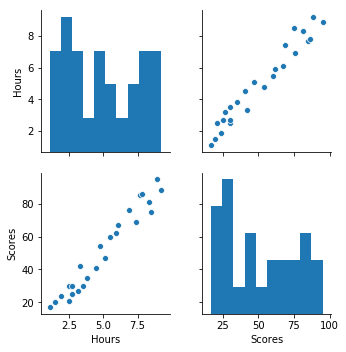

In [26]:
sns.pairplot(df)

In [27]:
import numpy as np

## Separating the variables

In [29]:
X=df.iloc[:,0].values.reshape(-1,1)
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [30]:
y=df.iloc[:,1].values.reshape(-1,1)
print(y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


## Splitting data for the train and test sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Training and predicting on the data

In [33]:
from sklearn.linear_model import LinearRegression  

In [34]:
lin=LinearRegression()

In [35]:
lin.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
Y_pred=lin.predict(X_test)

In [41]:
print(Y_pred)

[[78.78047878]
 [85.55640818]
 [52.64475109]
 [89.42836784]
 [29.41299313]]


## Plotting the line for regression

In [47]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [48]:
line=lin.coef_*X+lin.intercept_

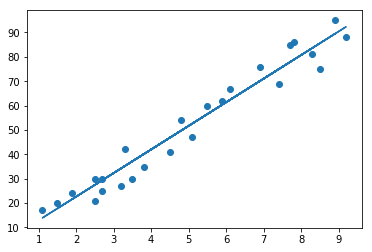

In [49]:
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

# Predicting on a new value

In [53]:
print(lin.predict([[9.25]]))

[[92.81633254]]


## Comparing the predicted and actual values

In [65]:
dict={'Actual': y_test, 'Predicted': Y_pred}
print(dict)

{'Actual': array([[86],
       [75],
       [47],
       [95],
       [25]], dtype=int64), 'Predicted': array([[78.78047878],
       [85.55640818],
       [52.64475109],
       [89.42836784],
       [29.41299313]])}


In [66]:
pd.DataFrame([dict])

,Actual,Predicted
0,"[[86], [75], [47], [95], [25]]","[[78.7804787809858], [85.55640818340026], [52...."


In [68]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Y_pred)) 

Mean Absolute Error: 6.681061156254709
